/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Duration of the audio sample [sec]:
30.0


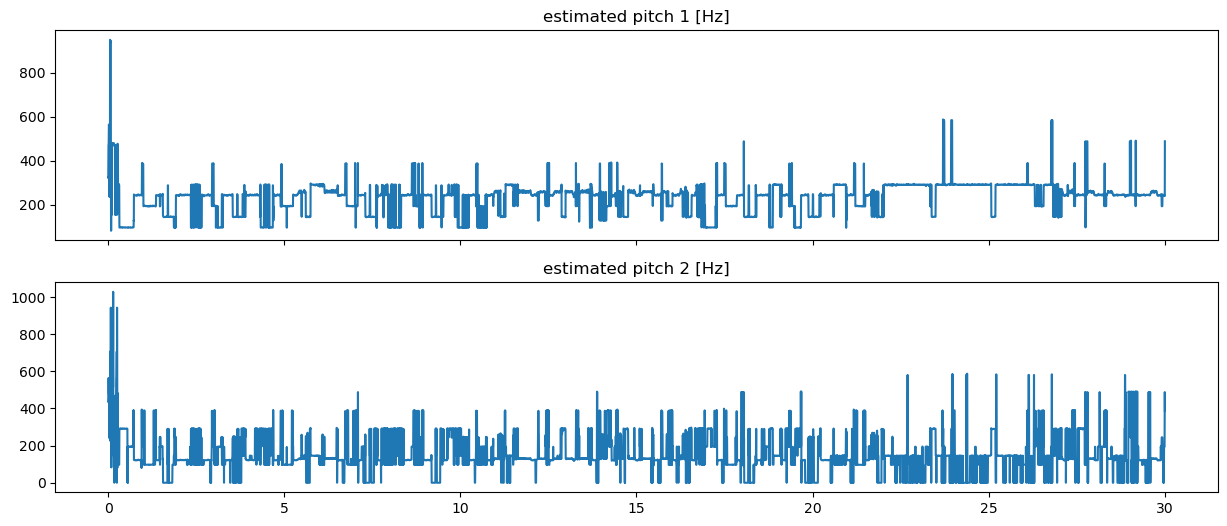

In [1]:
from PianoCrafter import PianoCrafter

pc = PianoCrafter('/data/laluna.mp3')
pc.extract_pitch()
pc.plot_descriptors()
#pc.save_midi()

In [8]:
from tempfile import TemporaryDirectory
import essentia.standard as es
from IPython.display import Audio, display
from mir_eval.sonify import pitch_contour
import numpy

def synth_melodies(pc):
    mel1 = [p[0] for p in pc.pitch_values]
    mel2 = []
    for p in pc.pitch_values:
        try:
            mel2.append(p[1])
        except:
            mel2.append(0.0)
    return (pitch_contour(pc.pitch_times, mel1, 44100).astype(numpy.float32)[:len(pc.audio)],
            pitch_contour(pc.pitch_times, mel2, 44100).astype(numpy.float32)[:len(pc.audio)])


temp_dir = TemporaryDirectory()
# Essentia operates with float32 ndarrays instead of float64, so let's cast it.
synthesized_melodies = synth_melodies(pc)
es.AudioWriter(filename=temp_dir.name + 'tmp1.mp3', format='mp3')(es.StereoMuxer()(pc.audio, synthesized_melodies[0]))
es.AudioWriter(filename=temp_dir.name + 'tmp2.mp3', format='mp3')(es.StereoMuxer()(pc.audio, synthesized_melodies[1]))

audio_in = Audio(pc.audiopath)
audio_out1 = Audio(temp_dir.name + 'tmp1.mp3')
audio_out2 = Audio(temp_dir.name + 'tmp2.mp3')


display(audio_in, audio_out1, audio_out2)

[mp3 @ 0x4069f49bc0] Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.
[AVIOContext @ 0x406bd46700] Statistics: 2 seeks, 4 writeouts
[mp3 @ 0x4069f4a200] Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.
[AVIOContext @ 0x2932fc0] Statistics: 2 seeks, 4 writeouts


/tmp/ipykernel_103/1049953568.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_file_path)


0


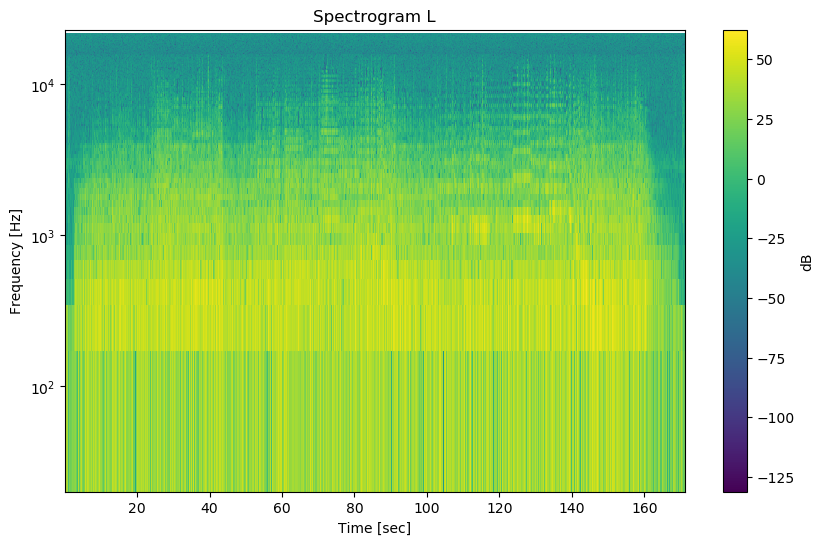

1


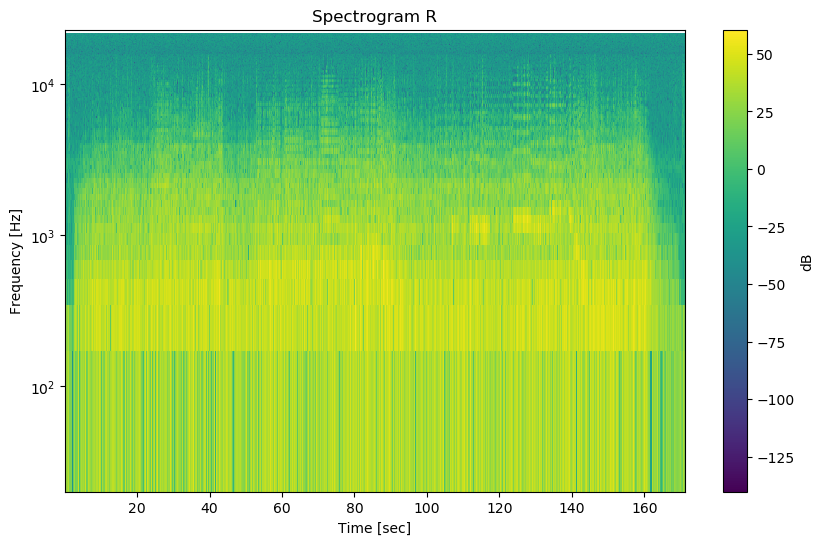

In [17]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = '/data/laluna.wav'
sample_rate, audio_data = wavfile.read(audio_file_path)

for i, channel in enumerate(["L", "R"]):
    # Compute the spectrogram
    npts = int(sample_rate)
    plt.figure(figsize=(10, 6))
    f, t, Sxx = spectrogram(audio_data[:,i], sample_rate, nperseg=npts, nfft=npts)
    plt.yscale('symlog')
    print(i)
    # Plot the spectrogram
    plt.title('Spectrogram %s' % channel)
    plt.specgram(audio_data[:,i],Fs=sample_rate)
    plt.ylim(20,23000)
    plt.colorbar(label='dB')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


In [17]:
len(out)

4